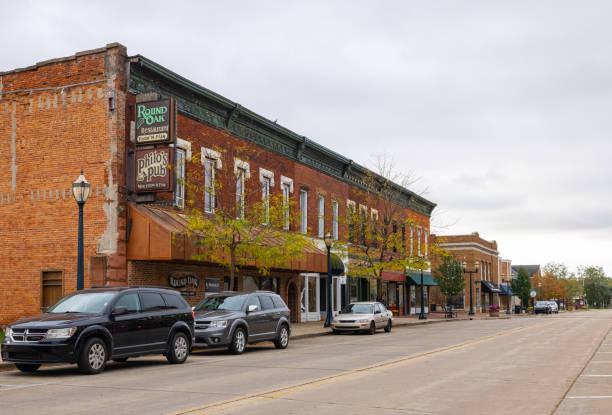

In [10]:
from transformers import pipeline
from PIL import Image
import requests

url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/segmentation_input.jpg"
image = Image.open(requests.get(url, stream=True).raw)
image

In [11]:
semantic_segmentation = pipeline("image-segmentation", "nvidia/segformer-b1-finetuned-cityscapes-1024-1024")
results = semantic_segmentation(image)
results

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


[{'score': None,
  'label': 'road',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'sidewalk',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'building',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'wall',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'pole',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'traffic sign',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'vegetation',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'terrain',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'sky',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'car',
  'mask': <PIL.Image.Image image mode=L size=612x415>}]

In [13]:
instance_segmentation = pipeline("image-segmentation", "facebook/mask2former-swin-large-cityscapes-instance")
# results = instance_segmentation(Image.open(image))
results = instance_segmentation(image)
results

`label_ids_to_fuse` unset. No instance will be fused.


[{'score': 0.999944,
  'label': 'car',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': 0.999945,
  'label': 'car',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': 0.999652,
  'label': 'car',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': 0.903529,
  'label': 'person',
  'mask': <PIL.Image.Image image mode=L size=612x415>}]

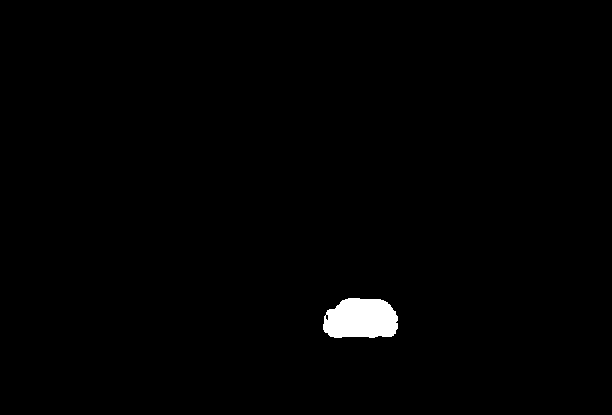

In [14]:
results[2]["mask"]

In [16]:
panoptic_segmentation = pipeline("image-segmentation", "facebook/mask2former-swin-large-cityscapes-panoptic")
results = panoptic_segmentation(image)
results

`label_ids_to_fuse` unset. No instance will be fused.


[{'score': 0.999981,
  'label': 'car',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': 0.999958,
  'label': 'car',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': 0.99997,
  'label': 'vegetation',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': 0.999575,
  'label': 'pole',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': 0.999958,
  'label': 'building',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': 0.999634,
  'label': 'road',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': 0.996092,
  'label': 'sidewalk',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': 0.999221,
  'label': 'car',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': 0.99987,
  'label': 'sky',
  'mask': <PIL.Image.Image image mode=L size=612x415>}]

In [17]:
from datasets import load_dataset

ds = load_dataset("scene_parse_150", split="train[:50]")

c:\git\hwars\hwars-venv\Lib\site-packages\datasets\load.py:1454: FutureWarning: The repository for scene_parse_150 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/scene_parse_150
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Generating train split:   0%|          | 0/20210 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3352 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [18]:
ds = ds.train_test_split(test_size=0.2)
train_ds = ds["train"]
test_ds = ds["test"]

In [19]:
train_ds[0]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x683>,
 'annotation': <PIL.PngImagePlugin.PngImageFile image mode=L size=512x683>,
 'scene_category': 4}

In [20]:
import json
from huggingface_hub import cached_download, hf_hub_url

repo_id = "huggingface/label-files"
filename = "ade20k-id2label.json"
id2label = json.load(open(cached_download(hf_hub_url(repo_id, filename, repo_type="dataset")), "r"))
id2label = {int(k): v for k, v in id2label.items()}
label2id = {v: k for k, v in id2label.items()}
num_labels = len(id2label)

c:\git\hwars\hwars-venv\Lib\site-packages\huggingface_hub\file_download.py:655: FutureWarning: 'cached_download' is the legacy way to download files from the HF hub, please consider upgrading to 'hf_hub_download'
  warnings.warn(


ade20k-id2label.json:   0%|          | 0.00/2.81k [00:00<?, ?B/s]

In [21]:
from transformers import AutoImageProcessor

checkpoint = "nvidia/mit-b0"
image_processor = AutoImageProcessor.from_pretrained(checkpoint, reduce_labels=True)

preprocessor_config.json:   0%|          | 0.00/272 [00:00<?, ?B/s]

c:\git\hwars\hwars-venv\Lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\binit\.cache\huggingface\hub\models--nvidia--mit-b0. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with 

In [22]:
from torchvision.transforms import ColorJitter

jitter = ColorJitter(brightness=0.25, contrast=0.25, saturation=0.25, hue=0.1)

In [23]:
def train_transforms(example_batch):
    images = [jitter(x) for x in example_batch["image"]]
    labels = [x for x in example_batch["annotation"]]
    inputs = image_processor(images, labels)
    return inputs


def val_transforms(example_batch):
    images = [x for x in example_batch["image"]]
    labels = [x for x in example_batch["annotation"]]
    inputs = image_processor(images, labels)
    return inputs

In [24]:
train_ds.set_transform(train_transforms)
test_ds.set_transform(val_transforms)

In [25]:
import evaluate

metric = evaluate.load("mean_iou")

In [26]:
import numpy as np
import torch
from torch import nn

def compute_metrics(eval_pred):
    with torch.no_grad():
        logits, labels = eval_pred
        logits_tensor = torch.from_numpy(logits)
        logits_tensor = nn.functional.interpolate(
            logits_tensor,
            size=labels.shape[-2:],
            mode="bilinear",
            align_corners=False,
        ).argmax(dim=1)

        pred_labels = logits_tensor.detach().cpu().numpy()
        metrics = metric.compute(
            predictions=pred_labels,
            references=labels,
            num_labels=num_labels,
            ignore_index=255,
            reduce_labels=False,
        )
        for key, value in metrics.items():
            if isinstance(value, np.ndarray):
                metrics[key] = value.tolist()
        return metrics

In [27]:
from transformers import AutoModelForSemanticSegmentation, TrainingArguments, Trainer

model = AutoModelForSemanticSegmentation.from_pretrained(checkpoint, id2label=id2label, label2id=label2id)

config.json:   0%|          | 0.00/70.0k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/14.4M [00:00<?, ?B/s]

Some weights of SegformerForSemanticSegmentation were not initialized from the model checkpoint at nvidia/mit-b0 and are newly initialized: ['decode_head.batch_norm.bias', 'decode_head.batch_norm.num_batches_tracked', 'decode_head.batch_norm.running_mean', 'decode_head.batch_norm.running_var', 'decode_head.batch_norm.weight', 'decode_head.classifier.bias', 'decode_head.classifier.weight', 'decode_head.linear_c.0.proj.bias', 'decode_head.linear_c.0.proj.weight', 'decode_head.linear_c.1.proj.bias', 'decode_head.linear_c.1.proj.weight', 'decode_head.linear_c.2.proj.bias', 'decode_head.linear_c.2.proj.weight', 'decode_head.linear_c.3.proj.bias', 'decode_head.linear_c.3.proj.weight', 'decode_head.linear_fuse.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [28]:
training_args = TrainingArguments(
    output_dir="segformer-b0-scene-parse-150",
    learning_rate=6e-5,
    num_train_epochs=50,
    per_device_train_batch_size=2,
    per_device_eval_batch_size=2,
    save_total_limit=3,
    evaluation_strategy="steps",
    save_strategy="steps",
    save_steps=20,
    eval_steps=20,
    logging_steps=1,
    eval_accumulation_steps=5,
    remove_unused_columns=False,
    push_to_hub=False,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=test_ds,
    compute_metrics=compute_metrics,
)

trainer.train()

  0%|          | 0/1000 [00:00<?, ?it/s]

{'loss': 4.9494, 'learning_rate': 5.994e-05, 'epoch': 0.05}
{'loss': 4.9076, 'learning_rate': 5.988e-05, 'epoch': 0.1}
{'loss': 4.8822, 'learning_rate': 5.982e-05, 'epoch': 0.15}
{'loss': 4.9272, 'learning_rate': 5.9760000000000004e-05, 'epoch': 0.2}
{'loss': 4.8847, 'learning_rate': 5.97e-05, 'epoch': 0.25}
{'loss': 4.9, 'learning_rate': 5.964e-05, 'epoch': 0.3}
{'loss': 4.876, 'learning_rate': 5.958e-05, 'epoch': 0.35}
{'loss': 4.8583, 'learning_rate': 5.952e-05, 'epoch': 0.4}
{'loss': 4.8116, 'learning_rate': 5.946e-05, 'epoch': 0.45}
{'loss': 4.8715, 'learning_rate': 5.94e-05, 'epoch': 0.5}
{'loss': 4.7919, 'learning_rate': 5.934e-05, 'epoch': 0.55}
{'loss': 4.7216, 'learning_rate': 5.928e-05, 'epoch': 0.6}
{'loss': 4.7596, 'learning_rate': 5.922e-05, 'epoch': 0.65}
{'loss': 4.7019, 'learning_rate': 5.916e-05, 'epoch': 0.7}
{'loss': 4.67, 'learning_rate': 5.91e-05, 'epoch': 0.75}
{'loss': 4.6953, 'learning_rate': 5.9040000000000004e-05, 'epoch': 0.8}
{'loss': 4.7186, 'learning_rate

  0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:259: RuntimeWarning: invalid value encountered in divide
  iou = total_area_intersect / total_area_union
C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:260: RuntimeWarning: invalid value encountered in divide
  acc = total_area_intersect / total_area_label


{'eval_loss': 4.832314968109131, 'eval_mean_iou': 0.014015884676875978, 'eval_mean_accuracy': 0.07633357508952676, 'eval_overall_accuracy': 0.2619517336102534, 'eval_per_category_iou': [0.2784508492529997, nan, 0.0, 0.4758563543670913, nan, 0.17789752701639916, 0.0, nan, 0.07272991151405751, 0.0, 0.011695201350373764, 0.0, 0.0, 0.0, 0.011236667688502235, 0.0, nan, 0.0, 0.04382489056740745, 0.0, 0.0, 0.0, 0.0, nan, 0.0, 0.0, 0.0, 0.07484265746811886, 0.0, 0.0, 0.0, nan, nan, 0.0, 0.0, nan, 0.0, 0.037376454397597896, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, nan, nan, 0.0, 0.08507111790290349, 0.0, 0.0, 0.0, nan, 0.0, nan, nan, 0.0, 0.0, 0.0, 0.003805303036673871, nan, nan, 0.0, 0.0, 0.0, 0.0, 0.1955245013325006, 0.0, 0.0, 0.0, nan, 0.024117165575304023, nan, nan, nan, 0.0, nan, nan, nan, 0.0, 0.0, 0.0, 0.005235716311437859, 0.0, 0.0, nan, 0.0, nan, 0.0, nan, 0.0, 0.0, nan, 0.0, nan, nan, nan, 0.0, nan, 0.0, 0.0, 0.0, 0.0, nan, 0.0, nan, nan, 0.0, nan, nan, 0.0, 0.0, nan, 0.0, 0.0, nan, 0.0, nan, 0.

  0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:259: RuntimeWarning: invalid value encountered in divide
  iou = total_area_intersect / total_area_union
C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:260: RuntimeWarning: invalid value encountered in divide
  acc = total_area_intersect / total_area_label


{'eval_loss': 4.395522594451904, 'eval_mean_iou': 0.0354725109438408, 'eval_mean_accuracy': 0.09399191509929651, 'eval_overall_accuracy': 0.37656956844542283, 'eval_per_category_iou': [0.3425422934735963, nan, 0.0, 0.6522427853267381, nan, 0.34281978376860434, nan, nan, 0.07209222802989596, nan, 0.007917007917007918, nan, 0.0, nan, 0.111635836337984, nan, nan, 0.0, 0.037694709722057844, 0.0, nan, nan, 0.0, nan, 0.0, nan, nan, 0.1161151520248731, 0.0, 0.0, nan, nan, nan, nan, nan, nan, 0.0, 0.06122933983669913, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, nan, nan, nan, 0.08733846317738936, nan, 0.0, nan, nan, nan, nan, nan, 0.0, 0.0, nan, 0.0, nan, nan, nan, nan, nan, nan, 0.15195319754844303, 0.0, 0.0, nan, nan, 0.0028798156917957253, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, 0.0, 0.0, 0.0, nan, nan, nan, nan, 0.0, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, 0.0, nan, 0.0,

  0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:259: RuntimeWarning: invalid value encountered in divide
  iou = total_area_intersect / total_area_union
C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:260: RuntimeWarning: invalid value encountered in divide
  acc = total_area_intersect / total_area_label


{'eval_loss': 3.8877511024475098, 'eval_mean_iou': 0.05771541733233012, 'eval_mean_accuracy': 0.11273559305585482, 'eval_overall_accuracy': 0.4023970555827072, 'eval_per_category_iou': [0.34474549359583645, nan, nan, 0.6801356496853521, nan, 0.4053588184474969, nan, nan, 0.10120927314022249, nan, 0.06665660655751449, nan, 0.0, nan, 0.2582217256643426, nan, nan, 0.0, 0.005556766179995642, 0.0, nan, nan, 0.0, nan, 0.0, nan, nan, 0.11436281119250497, 0.0, nan, nan, nan, nan, nan, nan, nan, 0.0, 0.07512955209451438, nan, nan, nan, 0.0, 0.0, 0.0, nan, nan, nan, 0.11699472001724076, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, 0.0, nan, nan, nan, nan, nan, nan, 0.16791378065413312, 0.0, 0.0, nan, nan, 0.030046913396380968, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, 0.0, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan

  0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:259: RuntimeWarning: invalid value encountered in divide
  iou = total_area_intersect / total_area_union
C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:260: RuntimeWarning: invalid value encountered in divide
  acc = total_area_intersect / total_area_label


{'eval_loss': 3.573787212371826, 'eval_mean_iou': 0.058542053238324995, 'eval_mean_accuracy': 0.11004861184048229, 'eval_overall_accuracy': 0.43062956761596366, 'eval_per_category_iou': [0.36906602526279897, nan, 0.0, 0.6510735497552207, nan, 0.4218757049911115, nan, nan, 0.15324032248053462, nan, 0.08629238243101117, nan, 0.0, nan, 0.26218014437285597, nan, nan, 0.0, 0.003828337568302939, 0.0, nan, nan, 0.0, nan, 0.0, nan, nan, 0.10920829338967328, 0.0, nan, nan, nan, nan, nan, nan, nan, 0.0, 0.052540661024622994, nan, nan, nan, 0.0, 0.0, 0.0, nan, nan, nan, 0.13043051021410867, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, 0.15708647749904076, 0.0, 0.0, nan, nan, 0.003401773782043494, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, 0.0, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, 

  0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:259: RuntimeWarning: invalid value encountered in divide
  iou = total_area_intersect / total_area_union
C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:260: RuntimeWarning: invalid value encountered in divide
  acc = total_area_intersect / total_area_label


{'eval_loss': 3.4071662425994873, 'eval_mean_iou': 0.061594210543405394, 'eval_mean_accuracy': 0.11916934601404967, 'eval_overall_accuracy': 0.4388103116408084, 'eval_per_category_iou': [0.370050460961952, nan, nan, 0.6411075612353567, nan, 0.3603205066692256, nan, nan, 0.19194503707461172, nan, 0.09477587902952007, nan, 0.0, nan, 0.3131952567719443, nan, nan, 0.0, 0.015106262320758283, 0.0, nan, nan, 0.0, nan, 0.0, nan, nan, 0.09945183452711592, 0.0, nan, nan, nan, nan, nan, nan, nan, 0.0, 0.0820681935983053, nan, nan, nan, 0.0, 0.0, 0.0, nan, nan, nan, 0.15283266480318522, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, 0.14291476474424045, 0.0, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, 0.0, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, na

  0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:259: RuntimeWarning: invalid value encountered in divide
  iou = total_area_intersect / total_area_union
C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:260: RuntimeWarning: invalid value encountered in divide
  acc = total_area_intersect / total_area_label


{'eval_loss': 3.28629732131958, 'eval_mean_iou': 0.07029519181542845, 'eval_mean_accuracy': 0.13022030961834133, 'eval_overall_accuracy': 0.4733381745556091, 'eval_per_category_iou': [0.4016725223476634, nan, nan, 0.6838562678539808, nan, 0.4261628815792412, nan, nan, 0.17717116976111752, nan, 0.1273416689081901, nan, 0.0, nan, 0.43639259297772254, nan, nan, 0.0, 0.008773851512695248, 0.0, nan, nan, 0.0, nan, 0.0, nan, nan, 0.10948410416495523, 0.0, nan, nan, nan, nan, nan, nan, nan, 0.0, 0.07632200277330135, nan, nan, nan, 0.0, 0.0, 0.0, nan, nan, nan, 0.17972406450324957, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, 0.18490654623502056, 0.0, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, 0.0, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan

  0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:259: RuntimeWarning: invalid value encountered in divide
  iou = total_area_intersect / total_area_union
C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:260: RuntimeWarning: invalid value encountered in divide
  acc = total_area_intersect / total_area_label


{'eval_loss': 3.171504259109497, 'eval_mean_iou': 0.07261746192974965, 'eval_mean_accuracy': 0.13436196180073606, 'eval_overall_accuracy': 0.4701329655522368, 'eval_per_category_iou': [0.39236334454388966, nan, nan, 0.6925676667200972, nan, 0.36182718546222425, nan, nan, 0.21087938781417945, nan, 0.22240252807789213, nan, 0.0, nan, 0.3863344019490642, nan, nan, 0.0, 0.008488126160595572, 0.0, nan, nan, 0.0, nan, 0.0, nan, nan, 0.14883539546920976, 0.0, nan, nan, nan, nan, nan, nan, nan, 0.0, 0.08612133168590562, nan, nan, nan, 0.0, 0.0, 0.0, nan, nan, nan, 0.20473244599970838, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, 0.1901466633072195, 0.0, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, 0.0, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, n

  0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:259: RuntimeWarning: invalid value encountered in divide
  iou = total_area_intersect / total_area_union
C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:260: RuntimeWarning: invalid value encountered in divide
  acc = total_area_intersect / total_area_label


{'eval_loss': 2.9736828804016113, 'eval_mean_iou': 0.06847853810177487, 'eval_mean_accuracy': 0.11483470694928358, 'eval_overall_accuracy': 0.4823890374777286, 'eval_per_category_iou': [0.426078737607969, nan, nan, 0.6954576483427612, nan, 0.39352245936060337, nan, nan, 0.19218755995548906, nan, 0.13864475037376958, nan, 0.0, nan, 0.41519003685376105, nan, nan, 0.0, 0.014552319187292374, 0.0, nan, nan, 0.0, nan, 0.0, nan, nan, 0.0673639868627731, 0.0, nan, nan, nan, nan, nan, nan, nan, 0.0, 0.05376925506006324, nan, nan, nan, 0.0, 0.0, 0.0, nan, nan, nan, 0.14016270961314958, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 4.9740355345098584e-06, nan, nan, nan, nan, nan, nan, 0.20220708681782912, 0.0, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, 0.0, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, na

  0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:259: RuntimeWarning: invalid value encountered in divide
  iou = total_area_intersect / total_area_union
C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:260: RuntimeWarning: invalid value encountered in divide
  acc = total_area_intersect / total_area_label


{'eval_loss': 3.0008702278137207, 'eval_mean_iou': 0.06995937586421015, 'eval_mean_accuracy': 0.12607173137596822, 'eval_overall_accuracy': 0.4674551136562315, 'eval_per_category_iou': [0.3955660619261753, nan, nan, 0.6805990756740221, nan, 0.37105973645157253, nan, nan, 0.18283372405219928, nan, 0.1817705154763235, nan, 0.0, nan, 0.42820234181857697, nan, nan, 0.0, 0.02667475332872843, 0.0, nan, nan, 0.0, nan, 0.0, nan, nan, 0.11631994565678866, 0.0, nan, nan, nan, nan, nan, nan, nan, 0.0, 0.05979837093875349, nan, nan, nan, 0.0, 0.0, 0.0, nan, nan, nan, 0.12718193115871804, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, 0.22836857808654745, 0.0, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, 0.0, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, n

  0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:259: RuntimeWarning: invalid value encountered in divide
  iou = total_area_intersect / total_area_union
C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:260: RuntimeWarning: invalid value encountered in divide
  acc = total_area_intersect / total_area_label


{'eval_loss': 2.9019134044647217, 'eval_mean_iou': 0.07636512247756784, 'eval_mean_accuracy': 0.1374232858574731, 'eval_overall_accuracy': 0.47997588062944563, 'eval_per_category_iou': [0.39923718169561595, nan, nan, 0.6856060358339492, nan, 0.3142550297128947, nan, nan, 0.21087540540916747, nan, 0.32115739963043843, nan, 0.0, nan, 0.4379508806184479, nan, nan, 0.0, 0.034277589662477376, 0.0, nan, nan, 0.0, nan, 0.0, nan, nan, 0.1570027724139419, 0.0, nan, nan, nan, nan, nan, nan, nan, 0.0, 0.07682309747440803, nan, nan, nan, 0.0, 0.0, 0.0, nan, nan, nan, 0.2004201316283955, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, 0.2169993750229771, 0.0, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, 0.0, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan

  0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:259: RuntimeWarning: invalid value encountered in divide
  iou = total_area_intersect / total_area_union
C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:260: RuntimeWarning: invalid value encountered in divide
  acc = total_area_intersect / total_area_label


{'eval_loss': 2.7335662841796875, 'eval_mean_iou': 0.07544347997952966, 'eval_mean_accuracy': 0.13164314330693752, 'eval_overall_accuracy': 0.4791988725861316, 'eval_per_category_iou': [0.4024376569198935, nan, nan, 0.7565386187167961, nan, 0.3399655991731597, nan, nan, 0.18598150344888187, nan, 0.3240304427418808, nan, 0.0, nan, 0.4352415989297814, nan, nan, 0.0, 0.022255463748741173, 0.0, nan, nan, 0.0, nan, 0.0, nan, nan, 0.1454862126083991, 0.0, nan, nan, nan, nan, nan, nan, nan, 0.0, 0.06480525315906888, nan, nan, nan, 0.0, 0.0, 0.0, nan, nan, nan, 0.14146682498640595, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.00025864984779451266, nan, nan, nan, nan, nan, nan, 0.1992713749003833, 0.0, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, 0.0, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, 

  0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:259: RuntimeWarning: invalid value encountered in divide
  iou = total_area_intersect / total_area_union
C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:260: RuntimeWarning: invalid value encountered in divide
  acc = total_area_intersect / total_area_label


{'eval_loss': 2.6356804370880127, 'eval_mean_iou': 0.07659316814175976, 'eval_mean_accuracy': 0.13099095454969464, 'eval_overall_accuracy': 0.49625523596079424, 'eval_per_category_iou': [0.42796027277471893, nan, nan, 0.710226683265899, nan, 0.3885912150564917, nan, nan, 0.2024655388040625, nan, 0.28861913755376767, nan, 0.0, nan, 0.42919584602868216, nan, nan, 0.0, 0.021916359667076, 0.0, nan, nan, 0.0, nan, 0.0, nan, nan, 0.17834838657938792, 0.0, nan, nan, nan, nan, nan, nan, nan, 0.0, 0.06604913913061539, nan, nan, nan, 0.0, 0.0, 0.0, nan, nan, nan, 0.14054306024938817, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.00018403931477686478, nan, nan, nan, nan, nan, nan, 0.2096270472455242, 0.0, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, 0.0, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, 

  0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:259: RuntimeWarning: invalid value encountered in divide
  iou = total_area_intersect / total_area_union
C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:260: RuntimeWarning: invalid value encountered in divide
  acc = total_area_intersect / total_area_label


{'eval_loss': 2.641723155975342, 'eval_mean_iou': 0.07660565759636391, 'eval_mean_accuracy': 0.1289426242795239, 'eval_overall_accuracy': 0.4863232760057802, 'eval_per_category_iou': [0.4100057874643865, nan, nan, 0.7216217373761054, nan, 0.344682603054197, nan, nan, 0.22398072586271234, nan, 0.31965315520889515, nan, 0.0, nan, 0.4174052943244193, nan, nan, 0.0, 0.022538559315039095, 0.0, nan, nan, 0.0, nan, 0.0, nan, nan, 0.17691442848219863, 0.0, nan, nan, nan, nan, nan, nan, nan, 0.0, 0.0584885141876969, nan, nan, nan, 0.0, 0.0, 0.0, nan, nan, nan, 0.12688223079204983, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0008754302540737351, nan, nan, nan, nan, nan, nan, 0.24117783753278227, 0.0, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, 0.0, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.

  0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:259: RuntimeWarning: invalid value encountered in divide
  iou = total_area_intersect / total_area_union
C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:260: RuntimeWarning: invalid value encountered in divide
  acc = total_area_intersect / total_area_label


{'eval_loss': 2.5780787467956543, 'eval_mean_iou': 0.0828212588598829, 'eval_mean_accuracy': 0.1385417548118771, 'eval_overall_accuracy': 0.5013633218049356, 'eval_per_category_iou': [0.43187284888267274, nan, nan, 0.7052940574862965, nan, 0.3780035648738278, nan, nan, 0.2220362444736359, nan, 0.43922968203459956, nan, 0.0, nan, 0.435660391066091, nan, nan, 0.0, 0.023455764650226363, 0.0, nan, nan, 0.0, nan, 0.0, nan, nan, 0.1929626740339773, 0.0, nan, nan, nan, nan, nan, nan, nan, 0.0, 0.06094453996661605, nan, nan, nan, 0.0, 0.0, 0.0, nan, nan, nan, 0.14672686230248308, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, 0.2766637246248897, 0.0, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, 0.0, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, n

  0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:259: RuntimeWarning: invalid value encountered in divide
  iou = total_area_intersect / total_area_union
C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:260: RuntimeWarning: invalid value encountered in divide
  acc = total_area_intersect / total_area_label


{'eval_loss': 2.429325580596924, 'eval_mean_iou': 0.09009837817566013, 'eval_mean_accuracy': 0.14362995688160887, 'eval_overall_accuracy': 0.5183066510424756, 'eval_per_category_iou': [0.4239402375306122, nan, nan, 0.7743131907702058, nan, 0.38080276929011564, nan, nan, 0.24192425238887386, nan, 0.5602179079601223, nan, 0.0, nan, 0.43185087929279375, nan, nan, 0.0, 0.03267523853784762, 0.0, nan, nan, 0.0, nan, 0.0, nan, nan, 0.18003509620738248, 0.0, nan, nan, nan, nan, nan, nan, nan, 0.0, 0.07173791465032331, nan, nan, nan, 0.0, 0.0, 0.0, nan, nan, nan, 0.18524729920478528, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, 0.3211903411933429, 0.0, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, 0.0, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan

  0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:259: RuntimeWarning: invalid value encountered in divide
  iou = total_area_intersect / total_area_union
C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:260: RuntimeWarning: invalid value encountered in divide
  acc = total_area_intersect / total_area_label


{'eval_loss': 2.481743812561035, 'eval_mean_iou': 0.08585861159675172, 'eval_mean_accuracy': 0.14164527258965265, 'eval_overall_accuracy': 0.5063673186594965, 'eval_per_category_iou': [0.4126925244136032, nan, nan, 0.7493229999774709, nan, 0.3596607255902047, nan, nan, 0.25875316163721107, nan, 0.4811568463840895, nan, 0.0, nan, 0.44530299443395344, nan, nan, 0.0, 0.02377323818903053, 0.0, nan, nan, 0.0, nan, 0.0, nan, nan, 0.20601356645003105, 0.0, nan, nan, nan, nan, nan, nan, nan, 0.0, 0.06053301971084117, nan, nan, nan, 0.0, 0.0, 0.0, nan, nan, nan, 0.15804608116761512, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, 0.2790893059160178, 0.0, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, 0.0, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan,

  0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:259: RuntimeWarning: invalid value encountered in divide
  iou = total_area_intersect / total_area_union
C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:260: RuntimeWarning: invalid value encountered in divide
  acc = total_area_intersect / total_area_label


{'eval_loss': 2.4074864387512207, 'eval_mean_iou': 0.08693488020278083, 'eval_mean_accuracy': 0.14201919875420663, 'eval_overall_accuracy': 0.5133209510806145, 'eval_per_category_iou': [0.4175080647625533, nan, nan, 0.7488792941785807, nan, 0.36039401330266796, nan, nan, 0.25000432907929143, nan, 0.4872667910447761, nan, 0.0, nan, 0.45153735822350916, nan, nan, 0.0, 0.027805257009998714, 0.0, nan, nan, 0.0, nan, 0.0, nan, nan, 0.19749060426879042, 0.0, nan, nan, nan, nan, nan, nan, nan, 0.0, 0.06238888145443423, nan, nan, nan, 0.0, 0.0, 0.0, nan, nan, nan, 0.17317163980639327, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.006441024829829409, nan, nan, nan, nan, nan, nan, 0.29450795015040826, 0.0, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, 0.0, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan

  0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:259: RuntimeWarning: invalid value encountered in divide
  iou = total_area_intersect / total_area_union
C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:260: RuntimeWarning: invalid value encountered in divide
  acc = total_area_intersect / total_area_label


{'eval_loss': 2.3532118797302246, 'eval_mean_iou': 0.09133000372642293, 'eval_mean_accuracy': 0.1456884476662792, 'eval_overall_accuracy': 0.5226905865333243, 'eval_per_category_iou': [0.42402986673086573, nan, nan, 0.770220109717415, nan, 0.3877990464737115, nan, nan, 0.24010616211125618, nan, 0.5416165854168378, nan, 0.0, nan, 0.4440763982799751, nan, nan, 0.0, 0.0496940613219683, 0.0, nan, nan, 0.0, nan, 0.0, nan, nan, 0.2049334627161476, 0.0, nan, nan, nan, nan, nan, nan, nan, 0.0, 0.06975502633563209, nan, nan, nan, 0.0, 0.0, 0.0, nan, nan, nan, 0.19635078591850005, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.002731982574918413, nan, nan, nan, nan, nan, nan, 0.3218866614596893, 0.0, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, 0.0, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, 

  0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:259: RuntimeWarning: invalid value encountered in divide
  iou = total_area_intersect / total_area_union
C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:260: RuntimeWarning: invalid value encountered in divide
  acc = total_area_intersect / total_area_label


{'eval_loss': 2.288299083709717, 'eval_mean_iou': 0.0902285761983799, 'eval_mean_accuracy': 0.1495548513430406, 'eval_overall_accuracy': 0.5099295203693207, 'eval_per_category_iou': [0.40191508210417337, nan, nan, 0.7435617176407722, nan, 0.38681532974305605, nan, nan, 0.27297637026252247, nan, 0.5326305824367374, nan, 0.0, nan, 0.4112528522279891, nan, nan, 0.0, 0.09392024185121686, 0.0, nan, nan, 0.0, nan, 0.0, nan, nan, 0.2249201658466142, 0.0, nan, nan, nan, nan, nan, nan, nan, 0.0, 0.06984445916330677, nan, nan, nan, 0.0, 0.0, 0.0, nan, nan, nan, 0.18304085428343686, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0002876499003144311, nan, nan, nan, nan, nan, nan, 0.2879777424750569, 0.0, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, 0.0, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0

  0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:259: RuntimeWarning: invalid value encountered in divide
  iou = total_area_intersect / total_area_union
C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:260: RuntimeWarning: invalid value encountered in divide
  acc = total_area_intersect / total_area_label


{'eval_loss': 2.264078140258789, 'eval_mean_iou': 0.09145981641651293, 'eval_mean_accuracy': 0.15121774129869694, 'eval_overall_accuracy': 0.5208531719086587, 'eval_per_category_iou': [0.42756217326309726, nan, nan, 0.7522888964318503, nan, 0.39465081570154464, nan, nan, 0.25064695320863506, nan, 0.5759901425805316, nan, 0.0, nan, 0.423065743229771, nan, nan, 0.0, 0.05182103101696747, 0.0, nan, nan, 0.0, nan, 0.0, nan, nan, 0.20044280054923036, 0.0, nan, nan, nan, nan, nan, nan, nan, 0.0, 0.0763652042209533, nan, nan, nan, 0.0, 0.0, 0.0, nan, nan, nan, 0.18963432688511647, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 8.925074003738615e-05, nan, nan, nan, nan, nan, nan, 0.31583531883278254, 0.0, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, 0.0, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0

  0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:259: RuntimeWarning: invalid value encountered in divide
  iou = total_area_intersect / total_area_union
C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:260: RuntimeWarning: invalid value encountered in divide
  acc = total_area_intersect / total_area_label


{'eval_loss': 2.257072925567627, 'eval_mean_iou': 0.09616528060278504, 'eval_mean_accuracy': 0.15436077674190624, 'eval_overall_accuracy': 0.5336601836032193, 'eval_per_category_iou': [0.43932709989570734, nan, nan, 0.7972326030140935, nan, 0.4257150852395872, nan, nan, 0.2635826428078691, nan, 0.6145109112063339, nan, 0.0, nan, 0.42407711058094566, nan, nan, 0.0, 0.060077974791711175, 0.0, nan, nan, 0.0, nan, 0.0, nan, nan, 0.21656815897653595, 0.0, nan, nan, nan, nan, nan, nan, nan, 0.0, 0.07245872053445629, nan, nan, nan, 0.0, 0.0, 0.0, nan, nan, nan, 0.1956962759020432, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.009901038967448978, nan, nan, nan, nan, nan, nan, 0.32746360219466886, 0.0, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, 0.0, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0

  0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:259: RuntimeWarning: invalid value encountered in divide
  iou = total_area_intersect / total_area_union
C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:260: RuntimeWarning: invalid value encountered in divide
  acc = total_area_intersect / total_area_label


{'eval_loss': 2.2687315940856934, 'eval_mean_iou': 0.09374053889539705, 'eval_mean_accuracy': 0.15171804156160715, 'eval_overall_accuracy': 0.5235749363471432, 'eval_per_category_iou': [0.41877905438777907, nan, nan, 0.7813173878242855, nan, 0.4015108381796738, nan, nan, 0.2697434870074041, nan, 0.5630611463341986, nan, 0.0, nan, 0.397775609851994, nan, nan, 0.0, 0.08642572283150549, 0.0, nan, nan, 0.0, nan, 0.0, nan, nan, 0.22358537976746712, 0.0, nan, nan, nan, nan, nan, nan, nan, 0.0, 0.05282994388764555, nan, nan, nan, 0.0, 0.0, 0.0, nan, nan, nan, 0.1995774437644249, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.019962941291203434, nan, nan, nan, nan, nan, nan, 0.3350526006882998, 0.0, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, 0.0, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0,

  0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:259: RuntimeWarning: invalid value encountered in divide
  iou = total_area_intersect / total_area_union
C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:260: RuntimeWarning: invalid value encountered in divide
  acc = total_area_intersect / total_area_label


{'eval_loss': 2.2191340923309326, 'eval_mean_iou': 0.0927097924234308, 'eval_mean_accuracy': 0.14811156698290343, 'eval_overall_accuracy': 0.5290355423239655, 'eval_per_category_iou': [0.42844721622236115, nan, nan, 0.7821269335545354, nan, 0.39454190080625456, nan, nan, 0.26278215391526155, nan, 0.5528841713380367, nan, 0.0, nan, 0.4319458969173885, nan, nan, 0.0, 0.07135700326379175, 0.0, nan, nan, 0.0, nan, 0.0, nan, nan, 0.21059584376711385, 0.0, nan, nan, nan, nan, nan, nan, nan, 0.0, 0.04718542513250172, nan, nan, nan, 0.0, 0.0, 0.0, nan, nan, nan, 0.1842878764614271, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.005618420145556967, nan, nan, nan, nan, nan, nan, 0.33661885541300274, 0.0, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, 0.0, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0

  0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:259: RuntimeWarning: invalid value encountered in divide
  iou = total_area_intersect / total_area_union
C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:260: RuntimeWarning: invalid value encountered in divide
  acc = total_area_intersect / total_area_label


{'eval_loss': 2.195500135421753, 'eval_mean_iou': 0.09350282637610521, 'eval_mean_accuracy': 0.1469578556945173, 'eval_overall_accuracy': 0.526754529700736, 'eval_per_category_iou': [0.42439747418056056, nan, nan, 0.7441122806394473, nan, 0.3989818143648149, nan, nan, 0.2963068848977425, nan, 0.5681011199539054, nan, 0.0, nan, 0.41148952298446045, nan, nan, 0.0, 0.07271641846301935, 0.0, nan, nan, 0.0, nan, 0.0, nan, nan, 0.2165048632692537, 0.0, nan, nan, nan, nan, nan, nan, nan, 0.0, 0.055675322755494236, nan, nan, nan, 0.0, 0.0, 0.0, nan, nan, nan, 0.18746259085079095, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.02752328636255075, nan, nan, nan, nan, nan, nan, 0.3368414763221687, 0.0, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, 0.0, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, 

  0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:259: RuntimeWarning: invalid value encountered in divide
  iou = total_area_intersect / total_area_union
C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:260: RuntimeWarning: invalid value encountered in divide
  acc = total_area_intersect / total_area_label


{'eval_loss': 2.1433327198028564, 'eval_mean_iou': 0.09576955388140997, 'eval_mean_accuracy': 0.14849500832044266, 'eval_overall_accuracy': 0.5390724044637912, 'eval_per_category_iou': [0.4415236501374707, nan, nan, 0.7814032427306168, nan, 0.413070892620694, nan, nan, 0.266237304929403, nan, 0.5552932669814129, nan, 0.0, nan, 0.41529333720921563, nan, nan, 0.0, 0.07966024321069194, 0.0, nan, nan, 0.0, nan, 0.0, nan, nan, 0.23079192800437015, 0.0, nan, nan, nan, nan, nan, nan, nan, 0.0, 0.05216848279878472, nan, nan, nan, 0.0, 0.0, 0.0, nan, nan, nan, 0.20258343169868012, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.03631609390461349, nan, nan, nan, nan, nan, nan, 0.35644028103044495, 0.0, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, 0.0, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0,

  0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:259: RuntimeWarning: invalid value encountered in divide
  iou = total_area_intersect / total_area_union
C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:260: RuntimeWarning: invalid value encountered in divide
  acc = total_area_intersect / total_area_label


{'eval_loss': 2.1136279106140137, 'eval_mean_iou': 0.09586879629575303, 'eval_mean_accuracy': 0.1475338644114454, 'eval_overall_accuracy': 0.542791959450833, 'eval_per_category_iou': [0.438981568777956, nan, nan, 0.7647846702170867, nan, 0.4054797216406365, nan, nan, 0.28377024305986315, nan, 0.5734484175914509, nan, 0.0, nan, 0.43344797327127155, nan, nan, 0.0, 0.06254423034150879, 0.0, nan, nan, 0.0, nan, 0.0, nan, nan, 0.22873611227132237, 0.0, nan, nan, nan, nan, nan, nan, nan, 0.0, 0.05116686159542085, nan, nan, nan, 0.0, 0.0, 0.0, nan, nan, nan, 0.18835769787962597, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.05711392166560682, nan, nan, nan, nan, nan, nan, 0.34692043351837165, 0.0, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, 0.0, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0,

  0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:259: RuntimeWarning: invalid value encountered in divide
  iou = total_area_intersect / total_area_union
C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:260: RuntimeWarning: invalid value encountered in divide
  acc = total_area_intersect / total_area_label


{'eval_loss': 2.1067919731140137, 'eval_mean_iou': 0.09577017043071775, 'eval_mean_accuracy': 0.14816813480758928, 'eval_overall_accuracy': 0.540869159326902, 'eval_per_category_iou': [0.4454441791989433, nan, nan, 0.786143271394327, nan, 0.43562501468273546, nan, nan, 0.28404318842565857, nan, 0.5712600044501682, nan, 0.0, nan, 0.411954029339448, nan, nan, 0.0, 0.04227080138285982, 0.0, nan, nan, 0.0, nan, 0.0, nan, nan, 0.2297669311017286, 0.0, nan, nan, nan, nan, nan, nan, nan, 0.0, 0.043229697522396526, nan, nan, nan, 0.0, 0.0, 0.0, nan, nan, nan, 0.18331202046035805, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.06270929019744186, nan, nan, nan, nan, nan, nan, 0.33504838907264484, 0.0, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, 0.0, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0,

  0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:259: RuntimeWarning: invalid value encountered in divide
  iou = total_area_intersect / total_area_union
C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:260: RuntimeWarning: invalid value encountered in divide
  acc = total_area_intersect / total_area_label


{'eval_loss': 2.1119332313537598, 'eval_mean_iou': 0.0959716107440167, 'eval_mean_accuracy': 0.147015906148262, 'eval_overall_accuracy': 0.5370243722742712, 'eval_per_category_iou': [0.4225299904514706, nan, nan, 0.7717806897920286, nan, 0.3875885498465057, nan, nan, 0.31502462484681726, nan, 0.552712129372972, nan, 0.0, nan, 0.41977532615749547, nan, nan, 0.0, 0.06205946033593087, 0.0, nan, nan, 0.0, nan, 0.0, nan, nan, 0.25489986990552155, 0.0, nan, nan, nan, nan, nan, nan, nan, 0.0, 0.042165387531801206, nan, nan, nan, 0.0, 0.0, 0.0, nan, nan, nan, 0.1999509069298744, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.06445091529573233, nan, nan, nan, nan, nan, nan, 0.34592657929451803, 0.0, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, 0.0, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, 

  0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:259: RuntimeWarning: invalid value encountered in divide
  iou = total_area_intersect / total_area_union
C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:260: RuntimeWarning: invalid value encountered in divide
  acc = total_area_intersect / total_area_label


{'eval_loss': 2.0716869831085205, 'eval_mean_iou': 0.09810583325945829, 'eval_mean_accuracy': 0.14995010323693042, 'eval_overall_accuracy': 0.5400746675861194, 'eval_per_category_iou': [0.42996355100436634, nan, nan, 0.7714224448010625, nan, 0.41155432838903594, nan, nan, 0.2993289456704091, nan, 0.5577912613131758, nan, 0.0, nan, 0.420645121328027, nan, nan, 0.0, 0.09261337138160478, 0.0, nan, nan, 0.0, nan, 0.0, nan, nan, 0.24209860935524652, 0.0, nan, nan, nan, nan, nan, nan, nan, 0.0, 0.04174045029091829, nan, nan, nan, 0.0, 0.0, 0.0, nan, nan, nan, 0.18948719985174595, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.10684587862134932, nan, nan, nan, nan, nan, nan, 0.3580158993044054, 0.0, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.002726269066985107, 0.0, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, n

  0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:259: RuntimeWarning: invalid value encountered in divide
  iou = total_area_intersect / total_area_union
C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:260: RuntimeWarning: invalid value encountered in divide
  acc = total_area_intersect / total_area_label


{'eval_loss': 2.084268569946289, 'eval_mean_iou': 0.09962914751036625, 'eval_mean_accuracy': 0.15242745328586882, 'eval_overall_accuracy': 0.5447338696626948, 'eval_per_category_iou': [0.43057202643073533, nan, nan, 0.7787883790029713, nan, 0.4198002733340516, nan, nan, 0.28546305342726386, nan, 0.5490348376987397, nan, 0.0, nan, 0.4129875529454564, nan, nan, 0.0, 0.09469529200473087, 0.0, nan, nan, 0.0, nan, 0.0, nan, nan, 0.2521675262258698, 0.0, nan, nan, nan, nan, nan, nan, nan, 0.0, 0.04775665399239544, nan, nan, nan, 0.0, 0.0, 0.0, nan, nan, nan, 0.1865611554235966, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.16096593601375897, nan, nan, nan, nan, nan, nan, 0.3550978273142249, 0.0, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.011275386600855843, 0.0, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan

  0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:259: RuntimeWarning: invalid value encountered in divide
  iou = total_area_intersect / total_area_union
C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:260: RuntimeWarning: invalid value encountered in divide
  acc = total_area_intersect / total_area_label


{'eval_loss': 2.0460872650146484, 'eval_mean_iou': 0.0973049371357462, 'eval_mean_accuracy': 0.14984455221875168, 'eval_overall_accuracy': 0.542123919568486, 'eval_per_category_iou': [0.42669229294144306, nan, nan, 0.7792615002169299, nan, 0.3998241485427603, nan, nan, 0.2827671785326508, nan, 0.546902443712428, nan, 0.0, nan, 0.4248300507696435, nan, nan, 0.0, 0.09518765342261973, 0.0, nan, nan, 0.0, nan, 0.0, nan, nan, 0.25872550313093073, 0.0, nan, nan, nan, nan, nan, nan, nan, 0.0, 0.03676125096561995, nan, nan, nan, 0.0, 0.0, 0.0, nan, nan, nan, 0.20559285037683786, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.07770487343879709, nan, nan, nan, nan, nan, nan, 0.34369144284821984, 0.0, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.014256296530967844, 0.0, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan

  0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:259: RuntimeWarning: invalid value encountered in divide
  iou = total_area_intersect / total_area_union
C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:260: RuntimeWarning: invalid value encountered in divide
  acc = total_area_intersect / total_area_label


{'eval_loss': 2.0577189922332764, 'eval_mean_iou': 0.10046977840846974, 'eval_mean_accuracy': 0.15049863973363445, 'eval_overall_accuracy': 0.5495435128570232, 'eval_per_category_iou': [0.4369007552388044, nan, nan, 0.7709147626948809, nan, 0.4173602035903432, nan, nan, 0.2870141297034315, nan, 0.5489730450360372, nan, 0.0, nan, 0.4130002047455468, nan, nan, 0.0, 0.09948905765066313, 0.0, nan, nan, 0.0, nan, 0.0, nan, nan, 0.26794943834444496, 0.0, nan, nan, nan, nan, nan, nan, nan, 0.0, 0.04014134368280275, nan, nan, nan, 0.0, 0.0, 0.0, nan, nan, nan, 0.2004129129129129, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.17920367507707358, nan, nan, nan, nan, nan, nan, 0.35217628467375783, 0.0, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.005255322988090942, 0.0, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, na

  0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:259: RuntimeWarning: invalid value encountered in divide
  iou = total_area_intersect / total_area_union
C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:260: RuntimeWarning: invalid value encountered in divide
  acc = total_area_intersect / total_area_label


{'eval_loss': 2.0388481616973877, 'eval_mean_iou': 0.09815803260669147, 'eval_mean_accuracy': 0.15014134071610893, 'eval_overall_accuracy': 0.5431916449069176, 'eval_per_category_iou': [0.4313186861239818, nan, nan, 0.7801001007583889, nan, 0.4172673437123181, nan, nan, 0.2824935565185374, nan, 0.5541080129940444, nan, 0.0, nan, 0.43172819689673625, nan, nan, 0.0, 0.08599994284135619, 0.0, nan, nan, 0.0, nan, 0.0, nan, nan, 0.25097369939027586, 0.0, nan, nan, nan, nan, nan, nan, nan, 0.0, 0.04074266458891064, nan, nan, nan, 0.0, 0.0, 0.0, nan, nan, nan, 0.1799859477464349, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.11139783765482089, nan, nan, nan, nan, nan, nan, 0.3546954873083046, 0.0, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.005509827733549228, 0.0, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, na

  0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:259: RuntimeWarning: invalid value encountered in divide
  iou = total_area_intersect / total_area_union
C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:260: RuntimeWarning: invalid value encountered in divide
  acc = total_area_intersect / total_area_label


{'eval_loss': 1.9858916997909546, 'eval_mean_iou': 0.10141999531331966, 'eval_mean_accuracy': 0.14798539532962765, 'eval_overall_accuracy': 0.5568911383676082, 'eval_per_category_iou': [0.44715456673493775, nan, nan, 0.7829078969483629, nan, 0.42568283494231224, nan, nan, 0.28147632157981445, nan, 0.5766980213154733, nan, 0.0, nan, 0.40931859608739163, nan, nan, 0.0, 0.07716927803984519, 0.0, nan, nan, 0.0, nan, 0.0, nan, nan, 0.2622699459085983, 0.0, nan, nan, nan, nan, nan, nan, nan, 0.0, 0.031941161019175206, nan, nan, nan, 0.0, 0.0, 0.0, nan, nan, nan, 0.18652273989999207, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.21344511721782333, nan, nan, nan, nan, nan, nan, 0.35944688979320655, 0.0, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0027664430458537934, 0.0, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, n

  0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:259: RuntimeWarning: invalid value encountered in divide
  iou = total_area_intersect / total_area_union
C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:260: RuntimeWarning: invalid value encountered in divide
  acc = total_area_intersect / total_area_label


{'eval_loss': 2.0135879516601562, 'eval_mean_iou': 0.09898627247555691, 'eval_mean_accuracy': 0.1476854041033611, 'eval_overall_accuracy': 0.5472787641384156, 'eval_per_category_iou': [0.43964919736316216, nan, nan, 0.7798657623353211, nan, 0.4122134457118902, nan, nan, 0.27100445962992026, nan, 0.5585161678612464, nan, 0.0, nan, 0.41813967129530405, nan, nan, 0.0, 0.11013060837788455, 0.0, nan, nan, 0.0, nan, 0.0, nan, nan, 0.27880281809310536, 0.0, nan, nan, nan, nan, nan, nan, nan, 0.0, 0.0348794467210325, nan, nan, nan, 0.0, 0.0, 0.0, nan, nan, nan, 0.1839334373925236, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.1019686981073169, nan, nan, nan, nan, nan, nan, 0.35737971545421526, 0.0, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.012967470679353839, 0.0, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, na

  0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:259: RuntimeWarning: invalid value encountered in divide
  iou = total_area_intersect / total_area_union
C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:260: RuntimeWarning: invalid value encountered in divide
  acc = total_area_intersect / total_area_label


{'eval_loss': 1.9908981323242188, 'eval_mean_iou': 0.1012870381522764, 'eval_mean_accuracy': 0.15222293345131005, 'eval_overall_accuracy': 0.5544991245953337, 'eval_per_category_iou': [0.43709765082432517, nan, nan, 0.7478043414360409, nan, 0.4082963662635429, nan, nan, 0.30622310181258444, nan, 0.5587175842223664, nan, 0.0, nan, 0.42700182532729775, nan, nan, 0.0, 0.08800591044308752, 0.0, nan, nan, 0.0, nan, 0.0, nan, nan, 0.2761194400687739, 0.0, nan, nan, nan, nan, nan, nan, nan, 0.0, 0.040392470627868785, nan, nan, nan, 0.0, 0.0, 0.0, nan, nan, nan, 0.1938658163665351, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.18464211627453414, nan, nan, nan, nan, nan, nan, 0.36390933979912166, 0.0, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.019405562624977276, 0.0, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, 

  0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:259: RuntimeWarning: invalid value encountered in divide
  iou = total_area_intersect / total_area_union
C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:260: RuntimeWarning: invalid value encountered in divide
  acc = total_area_intersect / total_area_label


{'eval_loss': 1.9755748510360718, 'eval_mean_iou': 0.10172971421063733, 'eval_mean_accuracy': 0.15296179904031645, 'eval_overall_accuracy': 0.5515671491896103, 'eval_per_category_iou': [0.431556188412887, nan, nan, 0.7762446343886483, nan, 0.4252305647980679, nan, nan, 0.28598968577831274, nan, 0.5539008561170947, nan, 0.0, nan, 0.4171384065954941, nan, nan, 0.0, 0.10394072262550588, 0.0, nan, nan, 0.0, nan, 0.0, nan, nan, 0.28235479496533417, 0.0, nan, nan, nan, nan, nan, nan, nan, 0.0, 0.034416841690732475, nan, nan, nan, 0.0, 0.0, 0.0, nan, nan, nan, 0.19584704856819454, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.18632985331618754, nan, nan, nan, nan, nan, nan, 0.3561183831329931, 0.0, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.02012058803604092, 0.0, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, na

  0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:259: RuntimeWarning: invalid value encountered in divide
  iou = total_area_intersect / total_area_union
C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:260: RuntimeWarning: invalid value encountered in divide
  acc = total_area_intersect / total_area_label


{'eval_loss': 1.9946978092193604, 'eval_mean_iou': 0.10039289608448732, 'eval_mean_accuracy': 0.1491871614911489, 'eval_overall_accuracy': 0.5488181427108839, 'eval_per_category_iou': [0.4338131892374405, nan, nan, 0.7821637565785724, nan, 0.4307329963235294, nan, nan, 0.3054256264249093, nan, 0.5346985286724537, nan, 0.0, nan, 0.40804603546744916, nan, nan, 0.0, 0.0818518861803689, 0.0, nan, nan, 0.0, nan, 0.0, nan, nan, 0.2885442910971885, 0.0, nan, nan, nan, nan, nan, nan, nan, 0.0, 0.03236053206273576, nan, nan, nan, 0.0, 0.0, 0.0, nan, nan, nan, 0.19334078735243643, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.15440975228933826, nan, nan, nan, nan, nan, nan, 0.3545125178098921, 0.0, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.01581594388317819, 0.0, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, 

  0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:259: RuntimeWarning: invalid value encountered in divide
  iou = total_area_intersect / total_area_union
C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:260: RuntimeWarning: invalid value encountered in divide
  acc = total_area_intersect / total_area_label


{'eval_loss': 2.018481492996216, 'eval_mean_iou': 0.09910429621975572, 'eval_mean_accuracy': 0.1484484331882759, 'eval_overall_accuracy': 0.5492145753860441, 'eval_per_category_iou': [0.4368074820731029, nan, nan, 0.7690963704862493, nan, 0.43074849269329907, nan, nan, 0.2860072458814683, nan, 0.5646416493501202, nan, 0.0, nan, 0.4229887055709463, nan, nan, 0.0, 0.046909158216481485, 0.0, nan, nan, 0.0, nan, 0.0, nan, nan, 0.2874501924574731, 0.0, nan, nan, nan, nan, nan, nan, nan, 0.0, 0.0359783289721004, nan, nan, nan, 0.0, 0.0, 0.0, nan, nan, nan, 0.1895430960774898, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.11947079241920813, nan, nan, nan, nan, nan, nan, 0.34208188927010225, 0.0, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.03244844532218803, 0.0, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, 

  0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:259: RuntimeWarning: invalid value encountered in divide
  iou = total_area_intersect / total_area_union
C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:260: RuntimeWarning: invalid value encountered in divide
  acc = total_area_intersect / total_area_label


{'eval_loss': 1.9573287963867188, 'eval_mean_iou': 0.1016236174768385, 'eval_mean_accuracy': 0.15026123641882783, 'eval_overall_accuracy': 0.5564516063451997, 'eval_per_category_iou': [0.44062894540745184, nan, nan, 0.7914206417789375, nan, 0.44046096232541715, nan, nan, 0.27484525362709805, nan, 0.5681395236217477, nan, 0.0, nan, 0.41716175980477216, nan, nan, 0.0, 0.0750573758484301, 0.0, nan, nan, 0.0, nan, 0.0, nan, nan, 0.2893045432586276, 0.0, nan, nan, nan, nan, nan, nan, nan, 0.0, 0.03388018005322015, nan, nan, nan, 0.0, 0.0, 0.0, nan, nan, nan, 0.18299099930763904, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.1914582823042152, nan, nan, nan, nan, nan, nan, 0.3373223253042812, 0.0, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0222739064317023, 0.0, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan,

  0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:259: RuntimeWarning: invalid value encountered in divide
  iou = total_area_intersect / total_area_union
C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:260: RuntimeWarning: invalid value encountered in divide
  acc = total_area_intersect / total_area_label


{'eval_loss': 1.9901912212371826, 'eval_mean_iou': 0.09997078578392792, 'eval_mean_accuracy': 0.1479395868194197, 'eval_overall_accuracy': 0.5522786950168209, 'eval_per_category_iou': [0.44212635909394565, nan, nan, 0.7808419130171468, nan, 0.4268916944784256, nan, nan, 0.29535326365698267, nan, 0.5414920970541786, nan, 0.0, nan, 0.4187218157790766, nan, nan, 0.0, 0.08321074451216018, 0.0, nan, nan, 0.0, nan, 0.0, nan, nan, 0.2856595490796035, 0.0, nan, nan, nan, nan, nan, nan, nan, 0.0, 0.03691213999270871, nan, nan, nan, 0.0, 0.0, 0.0, nan, nan, nan, 0.18880626124595776, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.11166682247359072, nan, nan, nan, nan, nan, nan, 0.3510103666777266, 0.0, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.03613840429561304, 0.0, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan

  0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:259: RuntimeWarning: invalid value encountered in divide
  iou = total_area_intersect / total_area_union
C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:260: RuntimeWarning: invalid value encountered in divide
  acc = total_area_intersect / total_area_label


{'eval_loss': 1.9970003366470337, 'eval_mean_iou': 0.10108702954265629, 'eval_mean_accuracy': 0.1510406366311659, 'eval_overall_accuracy': 0.554460091224241, 'eval_per_category_iou': [0.4399650060013862, nan, nan, 0.7793230036545236, nan, 0.43444157926541066, nan, nan, 0.2932289210963285, nan, 0.5510206793014342, nan, 0.0, nan, 0.4181552986103745, nan, nan, 0.0, 0.06471453125970718, 0.0, nan, nan, 0.0, nan, 0.0, nan, nan, 0.2832550396901844, 0.0, nan, nan, nan, nan, nan, nan, nan, 0.0, 0.03805976505935465, nan, nan, nan, 0.0, 0.0, 0.0, nan, nan, nan, 0.18153354871705316, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.16924368761540162, nan, nan, nan, nan, nan, nan, 0.35511251154810614, 0.0, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.03542760988698638, 0.0, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan,

  0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:259: RuntimeWarning: invalid value encountered in divide
  iou = total_area_intersect / total_area_union
C:\Users\binit\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\08bc20f4f895f3caf75fb9e3fada1404bded3c3265243d05327cbb3b9326ffe9\mean_iou.py:260: RuntimeWarning: invalid value encountered in divide
  acc = total_area_intersect / total_area_label


{'eval_loss': 1.9912408590316772, 'eval_mean_iou': 0.1031121131129286, 'eval_mean_accuracy': 0.1521282984011918, 'eval_overall_accuracy': 0.5585252541844994, 'eval_per_category_iou': [0.44108574902220127, nan, nan, 0.7763255344811777, nan, 0.4405411148098307, nan, nan, 0.3026347098141859, nan, 0.5414268999445772, nan, 0.0, nan, 0.4185857264130029, nan, nan, 0.0, 0.07508754501428039, 0.0, nan, nan, 0.0, nan, 0.0, nan, nan, 0.296434131018206, 0.0, nan, nan, nan, nan, nan, nan, nan, 0.0, 0.03599370171726615, nan, nan, nan, 0.0, 0.0, 0.0, nan, nan, nan, 0.1978875718812346, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.19627189071583978, nan, nan, nan, nan, nan, nan, 0.3497215020079664, 0.0, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.052488447677375136, 0.0, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, n

PermissionError: [WinError 5] Access is denied: 'segformer-b0-scene-parse-150\\tmp-checkpoint-860' -> 'segformer-b0-scene-parse-150\\checkpoint-860'

In [29]:
trainer.push_to_hub()

ValueError: Token is required (write-access action) but no token found. You need to provide a token or be logged in to Hugging Face with `huggingface-cli login` or `huggingface_hub.login`. See https://huggingface.co/settings/tokens.

# #Inference

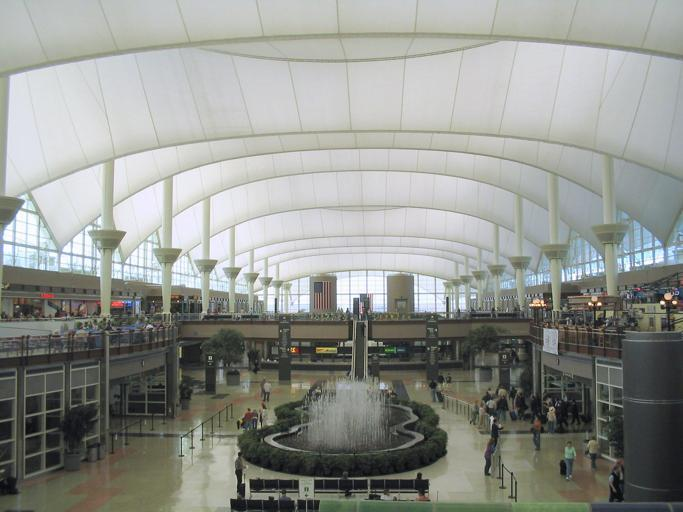

In [37]:
ds = load_dataset("scene_parse_150", split="train[:50]")
image = ds[0]["image"]
image

In [38]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # use GPU if available, otherwise use a CPU
encoding = image_processor(image, return_tensors="pt")
pixel_values = encoding.pixel_values.to(device)

In [39]:
outputs = model(pixel_values=pixel_values)
logits = outputs.logits.cpu()

In [40]:
upsampled_logits = nn.functional.interpolate(
    logits,
    size=image.size[::-1],
    mode="bilinear",
    align_corners=False,
)

pred_seg = upsampled_logits.argmax(dim=1)[0]

In [42]:
def ade_palette():
    """ADE20K palette that maps each class to RGB values."""
    return [[120, 120, 120], [180, 120, 120], [6, 230, 230], [80, 50, 50],
            [4, 200, 3], [120, 120, 80], [140, 140, 140], [204, 5, 255],
            [230, 230, 230], [4, 250, 7], [224, 5, 255], [235, 255, 7],
            [150, 5, 61], [120, 120, 70], [8, 255, 51], [255, 6, 82],
            [143, 255, 140], [204, 255, 4], [255, 51, 7], [204, 70, 3],
            [0, 102, 200], [61, 230, 250], [255, 6, 51], [11, 102, 255],
            [255, 7, 71], [255, 9, 224], [9, 7, 230], [220, 220, 220],
            [255, 9, 92], [112, 9, 255], [8, 255, 214], [7, 255, 224],
            [255, 184, 6], [10, 255, 71], [255, 41, 10], [7, 255, 255],
            [224, 255, 8], [102, 8, 255], [255, 61, 6], [255, 194, 7],
            [255, 122, 8], [0, 255, 20], [255, 8, 41], [255, 5, 153],
            [6, 51, 255], [235, 12, 255], [160, 150, 20], [0, 163, 255],
            [140, 140, 140], [250, 10, 15], [20, 255, 0], [31, 255, 0],
            [255, 31, 0], [255, 224, 0], [153, 255, 0], [0, 0, 255],
            [255, 71, 0], [0, 235, 255], [0, 173, 255], [31, 0, 255],
            [11, 200, 200], [255, 82, 0], [0, 255, 245], [0, 61, 255],
            [0, 255, 112], [0, 255, 133], [255, 0, 0], [255, 163, 0],
            [255, 102, 0], [194, 255, 0], [0, 143, 255], [51, 255, 0],
            [0, 82, 255], [0, 255, 41], [0, 255, 173], [10, 0, 255],
            [173, 255, 0], [0, 255, 153], [255, 92, 0], [255, 0, 255],
            [255, 0, 245], [255, 0, 102], [255, 173, 0], [255, 0, 20],
            [255, 184, 184], [0, 31, 255], [0, 255, 61], [0, 71, 255],
            [255, 0, 204], [0, 255, 194], [0, 255, 82], [0, 10, 255],
            [0, 112, 255], [51, 0, 255], [0, 194, 255], [0, 122, 255],
            [0, 255, 163], [255, 153, 0], [0, 255, 10], [255, 112, 0],
            [143, 255, 0], [82, 0, 255], [163, 255, 0], [255, 235, 0],
            [8, 184, 170], [133, 0, 255], [0, 255, 92], [184, 0, 255],
            [255, 0, 31], [0, 184, 255], [0, 214, 255], [255, 0, 112],
            [92, 255, 0], [0, 224, 255], [112, 224, 255], [70, 184, 160],
            [163, 0, 255], [153, 0, 255], [71, 255, 0], [255, 0, 163],
            [255, 204, 0], [255, 0, 143], [0, 255, 235], [133, 255, 0],
            [255, 0, 235], [245, 0, 255], [255, 0, 122], [255, 245, 0],
            [10, 190, 212], [214, 255, 0], [0, 204, 255], [20, 0, 255],
            [255, 255, 0], [0, 153, 255], [0, 41, 255], [0, 255, 204],
            [41, 0, 255], [41, 255, 0], [173, 0, 255], [0, 245, 255],
            [71, 0, 255], [122, 0, 255], [0, 255, 184], [0, 92, 255],
            [184, 255, 0], [0, 133, 255], [255, 214, 0], [25, 194, 194],
            [102, 255, 0], [92, 0, 255]]
     

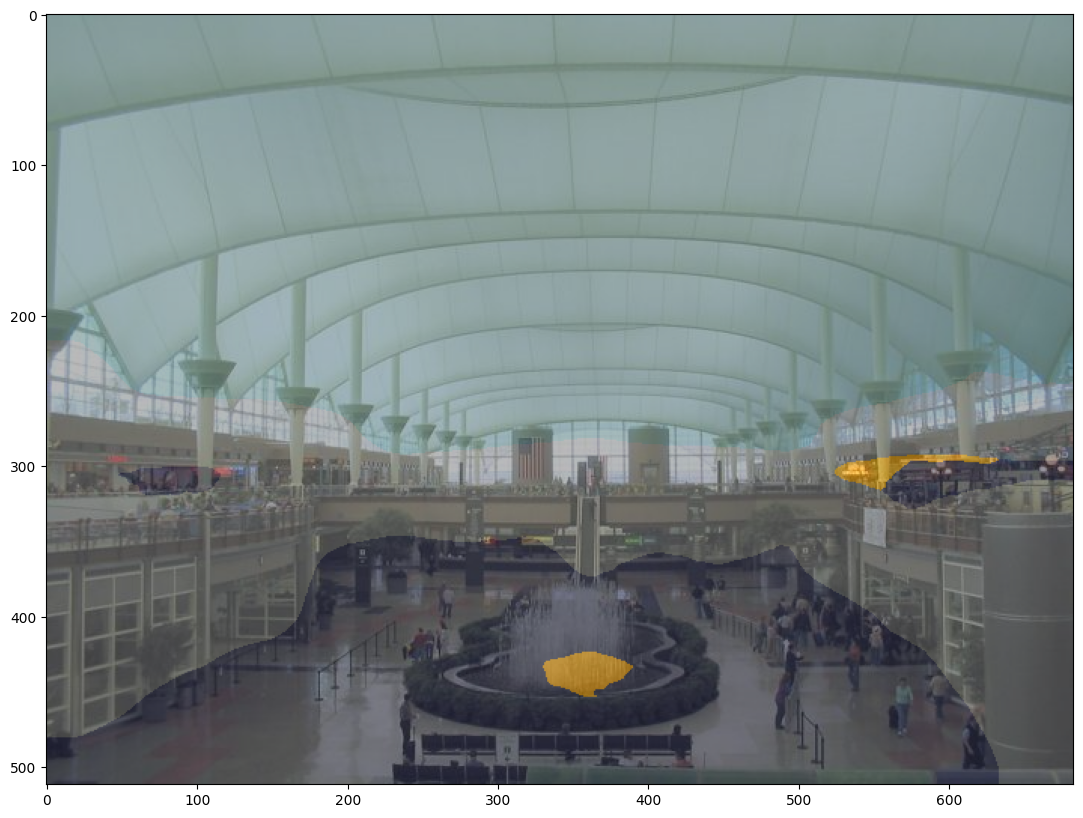

: 

In [43]:
import matplotlib.pyplot as plt
import numpy as np

color_seg = np.zeros((pred_seg.shape[0], pred_seg.shape[1], 3), dtype=np.uint8)
palette = np.array(ade_palette())
for label, color in enumerate(palette):
    color_seg[pred_seg == label, :] = color
color_seg = color_seg[..., ::-1]  # convert to BGR

img = np.array(image) * 0.5 + color_seg * 0.5  # plot the image with the segmentation map
img = img.astype(np.uint8)

plt.figure(figsize=(15, 10))
plt.imshow(img)
plt.show()